# Data Preparation

In [ ]:
from keras.layers.core import Layer
import keras.backend as K
import tensorflow as tf
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten, BatchNormalization, Activation, Add
import cv2 
from keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np 
from keras import backend as K 
from keras.utils import np_utils
from keras.regularizers import l2
import math 
from keras.optimizers import SGD, Adam, Adadelta 
from keras.callbacks import LearningRateScheduler
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import scipy
import os
import time
import keras
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Input, Add, BatchNormalization, Activation
from keras.initializers import glorot_uniform
from keras.activations import relu, softmax
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras import backend as K
from sklearn.metrics import confusion_matrix
from matplotlib import animation, rc
import matplotlib.patches as mpatches
from IPython.display import HTML, display, clear_output, SVG
import ipywidgets as widgets
import warnings
import glob
import shutil
import pickle
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/DL-A3')
os.listdir()

['.DS_Store',
 'ASL',
 'ISL',
 'model_res',
 'train.zip',
 'accuracy_curve.png',
 'loss_curve.png',
 'ASLmodel.png']

In [ ]:
import os, cv2, skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, Add, GlobalAveragePooling2D, DepthwiseConv2D, BatchNormalization, LeakyReLU
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau

imageSize=64
train_dir = "/content/drive/My Drive/DL-A3/ASL/train/"
test_dir =  "/content/drive/My Drive/DL-A3/ASL/test/"
from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir) 
#X_test, y_test= get_data(test_dir) # Too few images

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3) 

Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 30)
y_testHot = to_categorical(y_test, num_classes = 30)

Using TensorFlow backend.


In [ ]:
# Shuffle data to permit further subsampling
from sklearn.utils import shuffle

X_train, test, y_trainHot, testy = train_test_split(X_train, y_trainHot, test_size=0.1) 
X_train, y_trainHot = shuffle(X_train, y_trainHot, random_state=13)
X_test, y_testHot = shuffle(X_test, y_testHot, random_state=13)
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_trainHot))
print(np.shape(y_testHot))
print(np.shape(test))
print(np.shape(testy))

(5481, 64, 64, 3)
(2610, 64, 64, 3)
(5481, 30)
(2610, 30)
(609, 64, 64, 3)
(609, 30)


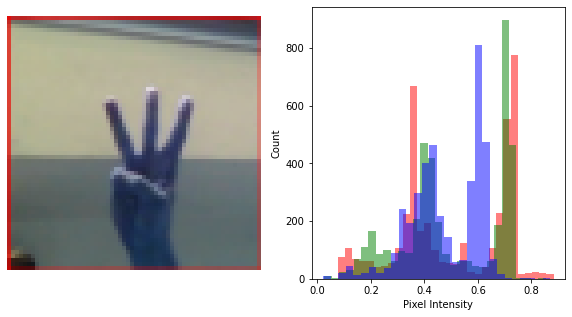

In [ ]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X_train[1])

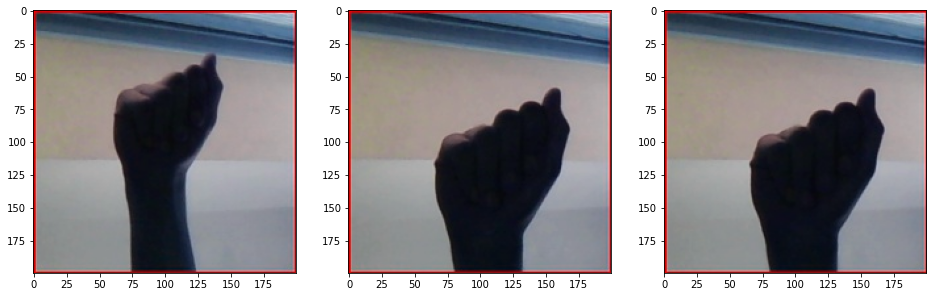

In [ ]:
import glob as a
import socket
import random
multipleImages = a.glob('/content/drive/My Drive/DL-A3/ASL/train/A/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]))
    #;
plotThreeImages(multipleImages)

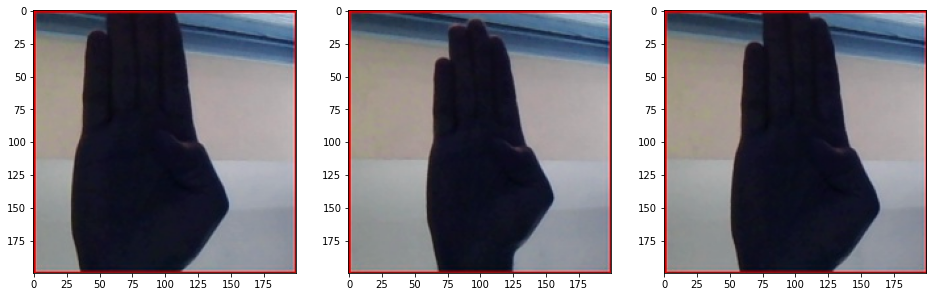

In [ ]:
import glob as a
import socket
import random
multipleImages = a.glob('/content/drive/My Drive/DL-A3/ASL/train/B/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])) 
plotThreeImages(multipleImages)

A


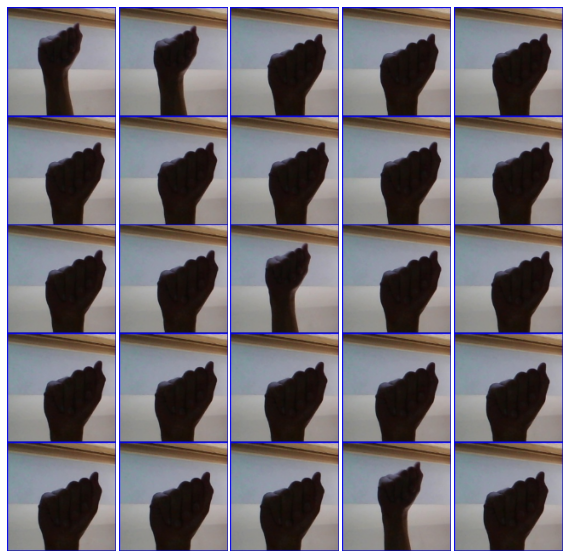

In [ ]:
import glob as a
import socket
import random
print("A")
multipleImages = a.glob('/content/drive/My Drive/DL-A3/ASL/train/A/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

B


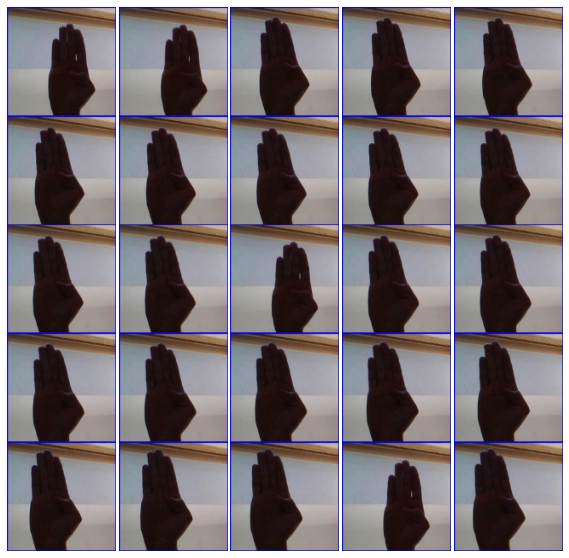

In [ ]:
import glob as a
import socket
import random
print("B")
multipleImages = a.glob('/content/drive/My Drive/DL-A3/ASL/train/B/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}


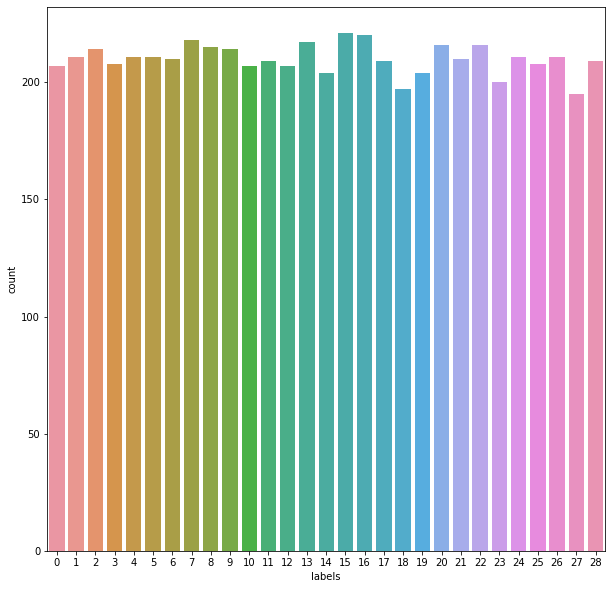

In [ ]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

# Data Augmentation

In [ ]:
target_size = (64,64)
batch_size = 64
train_image_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_image_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
)

train_generator = train_image_generator.flow(x=X_train, y=y_trainHot, batch_size=batch_size,shuffle=False)
val_generator = val_image_generator.flow(x=X_test, y=y_testHot, batch_size=batch_size, shuffle=False)

# Model

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 64, 64, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 32)   9248        leaky_re_lu_1[0][0]              
____________________________________________________________________________________________

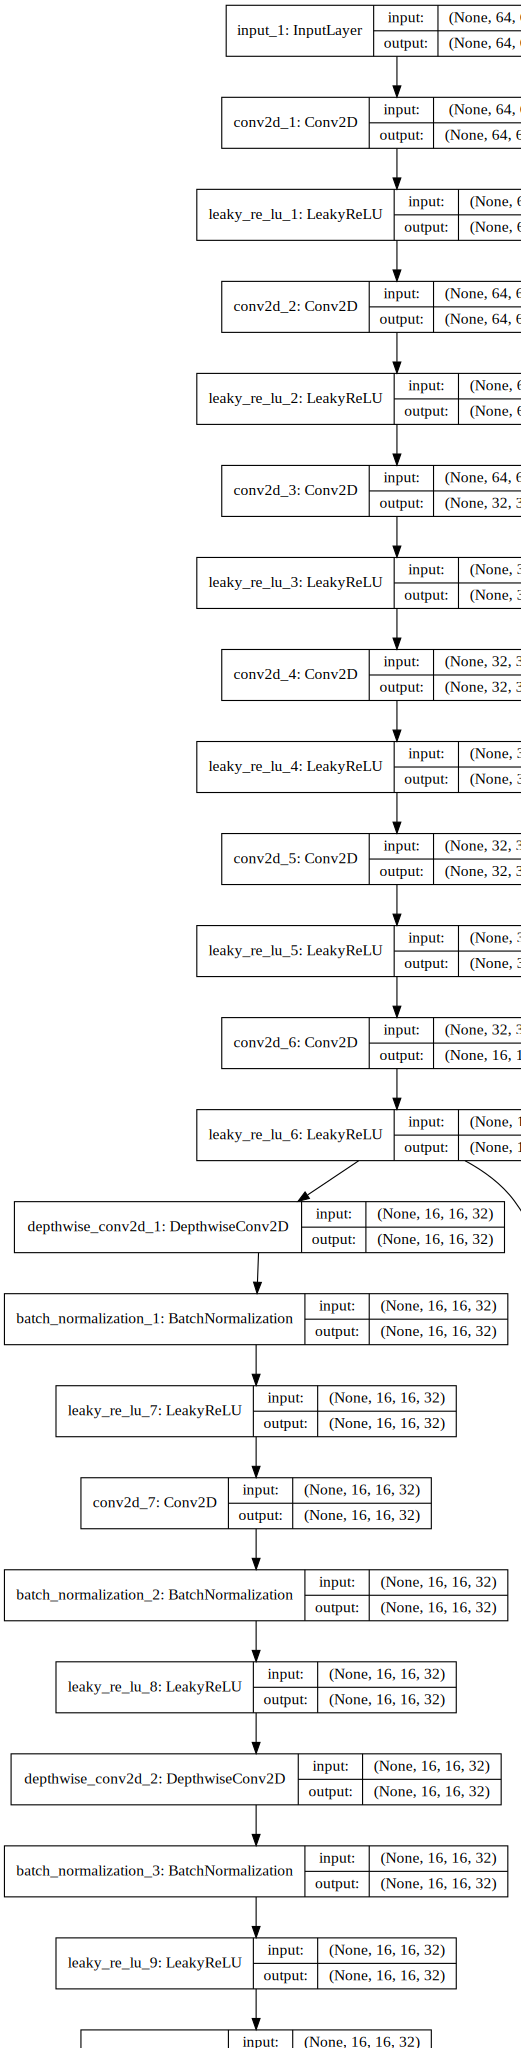

In [ ]:
inputs = Input(shape=(64,64,3))
net = Conv2D(32, kernel_size=3, strides=1, padding="same")(inputs)
net = LeakyReLU()(net)
net = Conv2D(32, kernel_size=3, strides=1, padding="same")(net)
net = LeakyReLU()(net)
net = Conv2D(32, kernel_size=3, strides=2, padding="same")(net)
net = LeakyReLU()(net)

net = Conv2D(32, kernel_size=3, strides=1, padding="same")(net)
net = LeakyReLU()(net)
net = Conv2D(32, kernel_size=3, strides=1, padding="same")(net)
net = LeakyReLU()(net)
net = Conv2D(32, kernel_size=3, strides=2, padding="same")(net)
net = LeakyReLU()(net)

shortcut = net

net = DepthwiseConv2D(kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)
net = Conv2D(filters=32, kernel_size=1, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)

net = DepthwiseConv2D(kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)
net = Conv2D(filters=32, kernel_size=1, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)

net = Add()([net, shortcut])

net = GlobalAveragePooling2D()(net)
net = Dropout(0.2)(net)

net = Dense(128, activation='relu')(net)
outputs = Dense(30, activation='softmax')(net)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

model.summary()
plot_model(model, to_file='ASLmodel.png')
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg'))

# Training

In [ ]:
import time
import datetime
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
callback_list = []
train_name = str(int(time.time()))
initial_epoch = 0
if not os.path.exists('/content/drive/My Drive/DL-A3/ASL/model_res/' + train_name):
    os.makedirs('/content/drive/My Drive/DL-A3/ASL/model_res/' + train_name)
model_path="/content/drive/My Drive/DL-A3/ASL/ASLmodel.hdf5"
#Assigning Callbacks
callback_list.append(EarlyStopping(monitor='val_loss', patience=1000))
callback_list.append(TensorBoard(log_dir='/content/drive/My Drive/DL-A3/ASL/logs1/res1/' + train_name))
callback_list.append(ModelCheckpoint(model_path, period=10, monitor='val_loss', mode='min'))
history=model.fit_generator(train_generator, epochs=30, validation_data=val_generator,steps_per_epoch=train_generator.__len__(),validation_steps=val_generator.__len__(),callbacks= callback_list) 


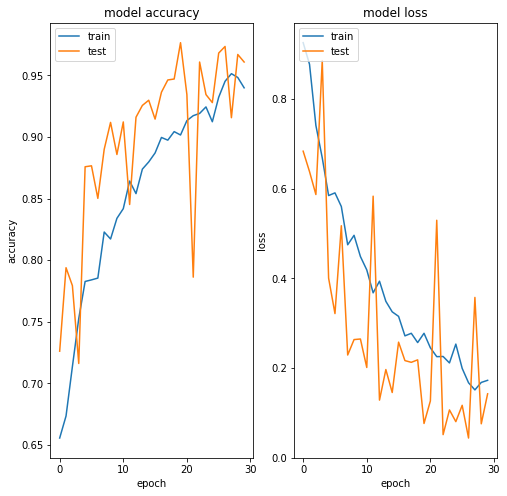

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/DL-A3/ASL/accuracy_curve.png')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/DL-A3/ASL/loss_curve.png')

In [ ]:
target_size = (64,64)
batch_size = 64
val_image_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
)

val_generator = val_image_generator.flow(x=test, y=testy,batch_size=batch_size, shuffle=False)
score=model.evaluate_generator(generator=val_generator,steps=val_generator.__len__())
print('Test', score[0])
print('Test categorical accuracy:', score[1])

Test 0.022963736206293106
Test categorical accuracy: 0.9556650519371033


In [ ]:
Test, Testy = get_data(test_dir) 
from keras.utils.np_utils import to_categorical
Testy = to_categorical(Testy, num_classes = 30)
target_size = (64,64)
batch_size = 64
test_image_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
)

100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


Correct Classification:


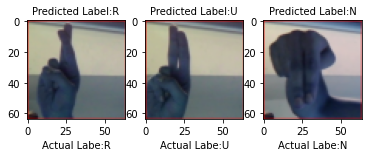

Incorrect Classification


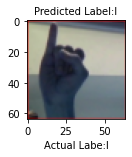

In [ ]:
Classes=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']
test_generator = test_image_generator.flow(x=Test, y=Testy, batch_size=batch_size,save_to_dir='/content/drive/My Drive/DL-A3/ASL/Test_Augmented',save_format='jpg', shuffle=False)
y_img_batch, y_class_batch = test_generator[0] 
#model=tf.keras.models.load_model('/content/drive/My Drive/DL-A3/ASL/ASLmodel.hdf5')
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
correct = np.where(y_pred==y_true)[0]
place_img=0
print("Correct Classification:")
for index in correct[:3]:
  plt.subplot(2,3,place_img+1)
  plt.imshow(Test[index])
  plt.title('Predicted Label:'+Classes[y_pred[index]-1],fontsize=10)
  plt.xlabel('Actual Labe:'+Classes[y_true[index]-1],fontsize=10)
  place_img=place_img+1
plt.show()
print("Incorrect Classification")
incorrect = np.where(y_pred!=y_true)[0]
for index in incorrect[:1]:
  plt.subplot(2,3,place_img+1)
  plt.imshow(Test[index])
  plt.title('Predicted Label:'+Classes[y_pred[index]],fontsize=10)
  plt.xlabel('Actual Labe:'+Classes[y_true[index]-1],fontsize=10)
  place_img=place_img+1
plt.show()